<a href="https://colab.research.google.com/github/obizoba/BIZI/blob/master/DATASET_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # for linear algebra processing
import pandas as pd # for processing of data  
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
!pip install umap-learn
import umap
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline 
import lightgbm as lgb

In [ ]:
# Importing dataset and reading
dataset = pd.read_csv("Collisions.csv")


In [ ]:
dataset.head()
dataset

,Number_of_Vehicles,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Manoeuvre,1st_Point_of_Impact,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Damage
0,2,Dual carriageway,40,Daylight,Fine no high winds,Dry,Urban,Going ahead,Front,Male,26,2496,Light
1,2,Dual carriageway,40,Daylight,Fine no high winds,Dry,Urban,Waiting,Back,Female,20,1198,Light
2,2,Single carriageway,30,Daylight,Fine no high winds,Dry,Urban,Going ahead,Front,Male,54,1199,Light
3,2,Single carriageway,30,Daylight,Fine no high winds,Dry,Urban,Turning,Offside,Male,39,1998,Light
4,2,Single carriageway,30,Daylight,Fine no high winds,Dry,Urban,Turning,Front,Male,38,1762,Light
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37864,4,Dual carriageway,70,Daylight,Fine no high winds,Dry,Rural,Going ahead,Front,Male,55,1998,Severe
37865,4,Dual carriageway,70,Daylight,Fine no high winds,Dry,Rural,Going ahead,Front,Male,42,2170,Severe
37866,4,Dual carriageway,70,Daylight,Fine no high winds,Dry,Rural,Going ahead,Front,Male,43,2664,Severe
37867,2,Dual carriageway,70,Darkness lights lit,Fine no high winds,Dry,Rural,Turning,Offside,Male,30,11021,Light


In [ ]:
dataset.shape

(37869, 13)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Number_of_Vehicles       37869 non-null  int64 
 1   Road_Type                37869 non-null  object
 2   Speed_limit              37869 non-null  int64 
 3   Light_Conditions         37869 non-null  object
 4   Weather_Conditions       37869 non-null  object
 5   Road_Surface_Conditions  37869 non-null  object
 6   Urban_or_Rural_Area      37869 non-null  object
 7   Vehicle_Manoeuvre        37869 non-null  object
 8   1st_Point_of_Impact      37869 non-null  object
 9   Sex_of_Driver            37869 non-null  object
 10  Age_of_Driver            37869 non-null  int64 
 11  Engine_Capacity_(CC)     37869 non-null  int64 
 12  Damage                   37869 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.8+ MB


In [ ]:
dataset.describe()

,Number_of_Vehicles,Speed_limit,Age_of_Driver,Engine_Capacity_(CC)
count,37869.000000,37869.000000,37869.000000,37869.000000
mean,2.231324,33.154031,38.381103,1929.625023
std,0.555507,9.532046,14.486654,1460.526046
min,2.000000,20.000000,16.000000,1086.000000
25%,2.000000,30.000000,27.000000,1388.000000
50%,2.000000,30.000000,36.000000,1598.000000
75%,2.000000,30.000000,47.000000,1991.000000
max,7.000000,70.000000,96.000000,76370.000000


## Missing Values
## There are no missing values in the dataset

In [ ]:
missing_values = dataset.isnull().sum()
print(missing_values)

Number_of_Vehicles         0
Road_Type                  0
Speed_limit                0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Vehicle_Manoeuvre          0
1st_Point_of_Impact        0
Sex_of_Driver              0
Age_of_Driver              0
Engine_Capacity_(CC)       0
Damage                     0
dtype: int64


# Label Encoding for Categorical Data with binary attributes
## Affected columns: insured_sex (female, male), fraud_reported (Y, N)

In [ ]:
# Assign label encoder
le = LabelEncoder()

# count of columns to be encoded
label_en_count = 0

# Loop through the columns 
for col in dataset:
  # if column is an object type
  if dataset[col].dtype == 'object':
    # and column has at most 2 unique categories
    if len(list(dataset[col].unique())) <= 2:
      # Train label encoder
      le.fit(dataset[col])
      print('Binary Data Detected!')
      # Transform train and test data
      dataset[col] = le.transform(dataset[col])
      print("Column Data Encoded")
      # Update Counter of columns encoded
      label_en_count += 1
            
print('%d columns got labels encoded.' % label_en_count)

Binary Data Detected!
Column Data Encoded
Binary Data Detected!
Column Data Encoded
Binary Data Detected!
Column Data Encoded
3 columns got labels encoded.


In [ ]:
dataset.info() #Damage,Urban_or_Rural_Area and Sex_of_Driver were encoded from object to binary integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Number_of_Vehicles       37869 non-null  int64 
 1   Road_Type                37869 non-null  object
 2   Speed_limit              37869 non-null  int64 
 3   Light_Conditions         37869 non-null  object
 4   Weather_Conditions       37869 non-null  object
 5   Road_Surface_Conditions  37869 non-null  object
 6   Urban_or_Rural_Area      37869 non-null  int64 
 7   Vehicle_Manoeuvre        37869 non-null  object
 8   1st_Point_of_Impact      37869 non-null  object
 9   Sex_of_Driver            37869 non-null  int64 
 10  Age_of_Driver            37869 non-null  int64 
 11  Engine_Capacity_(CC)     37869 non-null  int64 
 12  Damage                   37869 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 3.8+ MB


In [ ]:
encoded_columns = dataset[['Damage', 'Urban_or_Rural_Area','Sex_of_Driver']]
print(encoded_columns)

       Damage  Urban_or_Rural_Area  Sex_of_Driver
0           0                    1              1
1           0                    1              0
2           0                    1              1
3           0                    1              1
4           0                    1              1
...       ...                  ...            ...
37864       1                    0              1
37865       1                    0              1
37866       1                    0              1
37867       0                    0              1
37868       0                    0              1

[37869 rows x 3 columns]


# Correlation Matrix using Heatmap

In [ ]:
correlation = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=correlation.values,
    x=list(correlation.columns),
    y=list(correlation.index),
    annotation_text=correlation.round(2).values,
    showscale=True)
figure.show()

In [ ]:
# Features value count table for columns with object data type

col_name =[]
unique_value=[]
# Loop through columns
for col in dataset:
  # if column data type is object
    if dataset[col].dtype == 'object':
        # append column name to col_name list
        col_name.append(str(col)) 
        # append count of unique column values to unique_value list
        unique_value.append(dataset[col].nunique())

table= pd.DataFrame()
table['Col_name'] = col_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table


,Col_name,Value
4,Vehicle_Manoeuvre,10
2,Weather_Conditions,7
0,Road_Type,5
3,Road_Surface_Conditions,5
1,Light_Conditions,4
5,1st_Point_of_Impact,4


In [ ]:
# Features value table for columns with integer data type

col_name =[]
unique_value=[]
# Loop through columns
for col in dataset:
  # if column data type is object
    if dataset[col].dtype == 'int64':
        # append column name to col_name list
        col_name.append(str(col)) 
        # append count of unique column values to unique_value list
        unique_value.append(dataset[col].nunique())

table= pd.DataFrame()
table['Col_name'] = col_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table


,Col_name,Value
5,Engine_Capacity_(CC),643
4,Age_of_Driver,81
0,Number_of_Vehicles,6
1,Speed_limit,6
2,Urban_or_Rural_Area,2
3,Sex_of_Driver,2
6,Damage,2


In [ ]:
# dropping columns with high correlation
dropped_columns = dataset.drop(['Urban_or_Rural_Area'],axis=1,inplace=True)
dataset.head()

,Number_of_Vehicles,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Manoeuvre,1st_Point_of_Impact,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Damage
0,2,Dual carriageway,40,Daylight,Fine no high winds,Dry,Going ahead,Front,1,26,2496,0
1,2,Dual carriageway,40,Daylight,Fine no high winds,Dry,Waiting,Back,0,20,1198,0
2,2,Single carriageway,30,Daylight,Fine no high winds,Dry,Going ahead,Front,1,54,1199,0
3,2,Single carriageway,30,Daylight,Fine no high winds,Dry,Turning,Offside,1,39,1998,0
4,2,Single carriageway,30,Daylight,Fine no high winds,Dry,Turning,Front,1,38,1762,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Number_of_Vehicles       37869 non-null  int64 
 1   Road_Type                37869 non-null  object
 2   Speed_limit              37869 non-null  int64 
 3   Light_Conditions         37869 non-null  object
 4   Weather_Conditions       37869 non-null  object
 5   Road_Surface_Conditions  37869 non-null  object
 6   Vehicle_Manoeuvre        37869 non-null  object
 7   1st_Point_of_Impact      37869 non-null  object
 8   Sex_of_Driver            37869 non-null  int64 
 9   Age_of_Driver            37869 non-null  int64 
 10  Engine_Capacity_(CC)     37869 non-null  int64 
 11  Damage                   37869 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 3.5+ MB


# Convert Categorical Variables to dummies

In [ ]:
# Creating dummy columns
categorical_features = ['Vehicle_Manoeuvre', 'Weather_Conditions', 'Road_Type', 'Road_Surface_Conditions', 'Light_Conditions','1st_Point_of_Impact']
final_data = pd.get_dummies(dataset, columns = categorical_features)
print(final_data.info())
print(final_data.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Number_of_Vehicles                           37869 non-null  int64
 1   Speed_limit                                  37869 non-null  int64
 2   Sex_of_Driver                                37869 non-null  int64
 3   Age_of_Driver                                37869 non-null  int64
 4   Engine_Capacity_(CC)                         37869 non-null  int64
 5   Damage                                       37869 non-null  int64
 6   Vehicle_Manoeuvre_Changing lane              37869 non-null  uint8
 7   Vehicle_Manoeuvre_Going ahead                37869 non-null  uint8
 8   Vehicle_Manoeuvre_Moving off                 37869 non-null  uint8
 9   Vehicle_Manoeuvre_Overtaking                 37869 non-null  uint8
 10  Vehicle_Manoeuvre_Park

In [ ]:
#Vehicle_Manoeuvre and Weather_Conditions
subset1 = final_data[['Vehicle_Manoeuvre_Changing lane','Vehicle_Manoeuvre_Going ahead','Vehicle_Manoeuvre_Moving off','Vehicle_Manoeuvre_Overtaking','Vehicle_Manoeuvre_Parked','Vehicle_Manoeuvre_Reversing','Vehicle_Manoeuvre_Slowing or stopping','Vehicle_Manoeuvre_Turning','Vehicle_Manoeuvre_Turning','Vehicle_Manoeuvre_U turn','Vehicle_Manoeuvre_Waiting']]
subset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Vehicle_Manoeuvre_Changing lane        37869 non-null  uint8
 1   Vehicle_Manoeuvre_Going ahead          37869 non-null  uint8
 2   Vehicle_Manoeuvre_Moving off           37869 non-null  uint8
 3   Vehicle_Manoeuvre_Overtaking           37869 non-null  uint8
 4   Vehicle_Manoeuvre_Parked               37869 non-null  uint8
 5   Vehicle_Manoeuvre_Reversing            37869 non-null  uint8
 6   Vehicle_Manoeuvre_Slowing or stopping  37869 non-null  uint8
 7   Vehicle_Manoeuvre_Turning              37869 non-null  uint8
 8   Vehicle_Manoeuvre_Turning              37869 non-null  uint8
 9   Vehicle_Manoeuvre_U turn               37869 non-null  uint8
 10  Vehicle_Manoeuvre_Waiting              37869 non-null  uint8
dtypes: uint8(11)
memory usage: 4

In [ ]:
#Weather_Conditions
subset2 = final_data[['Weather_Conditions_Fine and high winds','Weather_Conditions_Fine no high winds','Weather_Conditions_Fog or mist','Weather_Conditions_Raining and high winds','Weather_Conditions_Raining no high winds','Weather_Conditions_Snowing and high winds','Weather_Conditions_Snowing no high winds']]
subset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Weather_Conditions_Fine and high winds     37869 non-null  uint8
 1   Weather_Conditions_Fine no high winds      37869 non-null  uint8
 2   Weather_Conditions_Fog or mist             37869 non-null  uint8
 3   Weather_Conditions_Raining and high winds  37869 non-null  uint8
 4   Weather_Conditions_Raining no high winds   37869 non-null  uint8
 5   Weather_Conditions_Snowing and high winds  37869 non-null  uint8
 6   Weather_Conditions_Snowing no high winds   37869 non-null  uint8
dtypes: uint8(7)
memory usage: 259.0 KB


In [ ]:
#Road_Type and Road_Surface
subset3 = final_data[['Road_Type_Dual carriageway','Road_Type_One way street','Road_Type_Roundabout','Road_Type_Single carriageway','Road_Type_Slip road','Road_Surface_Conditions_Dry','Road_Surface_Conditions_Flood over 3cm deep','Road_Surface_Conditions_Frost or ice','Road_Surface_Conditions_Snow','Road_Surface_Conditions_Wet or damp']]
subset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Road_Type_Dual carriageway                   37869 non-null  uint8
 1   Road_Type_One way street                     37869 non-null  uint8
 2   Road_Type_Roundabout                         37869 non-null  uint8
 3   Road_Type_Single carriageway                 37869 non-null  uint8
 4   Road_Type_Slip road                          37869 non-null  uint8
 5   Road_Surface_Conditions_Dry                  37869 non-null  uint8
 6   Road_Surface_Conditions_Flood over 3cm deep  37869 non-null  uint8
 7   Road_Surface_Conditions_Frost or ice         37869 non-null  uint8
 8   Road_Surface_Conditions_Snow                 37869 non-null  uint8
 9   Road_Surface_Conditions_Wet or damp          37869 non-null  uint8
dtypes: uint8(10)
memory us

In [ ]:
#Light_Conditions and 1st_Point and other likly collsion factors
subset4 = final_data[['Speed_limit','Sex_of_Driver','Age_of_Driver','Engine_Capacity_(CC)','Damage','Light_Conditions_Darkness lights lit','Light_Conditions_Darkness lights unlit','Light_Conditions_Darkness no lighting','Light_Conditions_Daylight','1st_Point_of_Impact_Back','1st_Point_of_Impact_Front','1st_Point_of_Impact_Nearside','1st_Point_of_Impact_Offside']]
subset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Speed_limit                             37869 non-null  int64
 1   Sex_of_Driver                           37869 non-null  int64
 2   Age_of_Driver                           37869 non-null  int64
 3   Engine_Capacity_(CC)                    37869 non-null  int64
 4   Damage                                  37869 non-null  int64
 5   Light_Conditions_Darkness lights lit    37869 non-null  uint8
 6   Light_Conditions_Darkness lights unlit  37869 non-null  uint8
 7   Light_Conditions_Darkness no lighting   37869 non-null  uint8
 8   Light_Conditions_Daylight               37869 non-null  uint8
 9   1st_Point_of_Impact_Back                37869 non-null  uint8
 10  1st_Point_of_Impact_Front               37869 non-null  uint8
 11  1st_Point_of_Im

In [ ]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X1 = feature_scaler.fit_transform(subset1)
X2 = feature_scaler.fit_transform(subset2)
X3 = feature_scaler.fit_transform(subset3)
X4 = feature_scaler.fit_transform(subset4)

# Analysis on subset 1

In [ ]:
# Analysis on subset1 - Personal Data
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_neighbors=150, min_dist=0.4)
x_umap = u.fit_transform(X1)

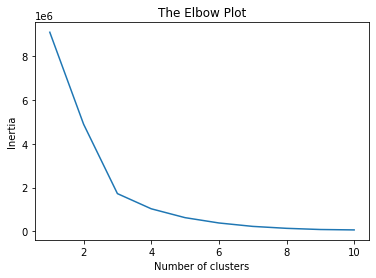

In [ ]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x_umap)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
subset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Vehicle_Manoeuvre_Changing lane        37869 non-null  uint8
 1   Vehicle_Manoeuvre_Going ahead          37869 non-null  uint8
 2   Vehicle_Manoeuvre_Moving off           37869 non-null  uint8
 3   Vehicle_Manoeuvre_Overtaking           37869 non-null  uint8
 4   Vehicle_Manoeuvre_Parked               37869 non-null  uint8
 5   Vehicle_Manoeuvre_Reversing            37869 non-null  uint8
 6   Vehicle_Manoeuvre_Slowing or stopping  37869 non-null  uint8
 7   Vehicle_Manoeuvre_Turning              37869 non-null  uint8
 8   Vehicle_Manoeuvre_Turning              37869 non-null  uint8
 9   Vehicle_Manoeuvre_U turn               37869 non-null  uint8
 10  Vehicle_Manoeuvre_Waiting              37869 non-null  uint8
dtypes: uint8(11)
memory usage: 4

In [ ]:
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x_umap)

Vehicle_Manoeuvre = list(dataset['Vehicle_Manoeuvre'])

data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.4),
                                text=[f'Vehicle_Manoeuvre: {a};' for a in list(zip(Vehicle_Manoeuvre))],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
# Implementing UMAP to visualize subset2
u = umap.UMAP(n_neighbors=150, min_dist=0.4)
x_umap = u.fit_transform(X2)

In [ ]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x_umap)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
subset2.info()

In [ ]:
# Running KMeans to generate labels for subset2
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x_umap)

collision_type = list(dataset['collision_type'])
authorities_contacted = list(dataset['authorities_contacted'])


data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.4),
                                text=[f'collision_type: {a}; authorities_contacted: {b}' for a,b in list(zip(collision_type,authorities_contacted))],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()